In [418]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,10)

from ipyfilechooser import FileChooser

#Выбор входного изображения
#Путь не должен содержать кириллицу!
fc = FileChooser()
display(fc)

FileChooser(path='C:\Users\Vladislav\Documents\Processing and recognition of images', filename='', title='', s…

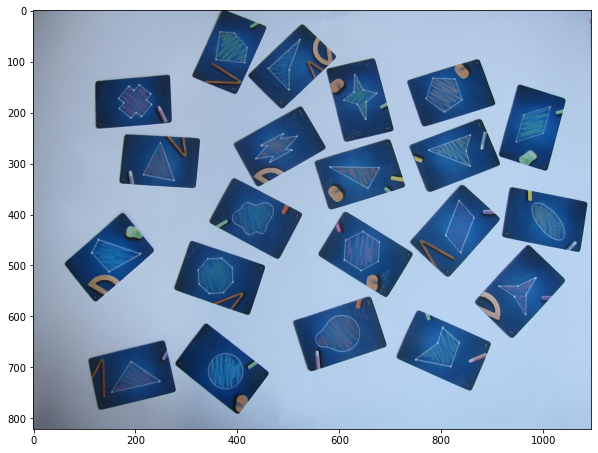

In [423]:
#Считывание изображения
img = cv2.imread(fc.selected, cv2.IMREAD_COLOR)
h = len(img)
w = len(img[0])
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

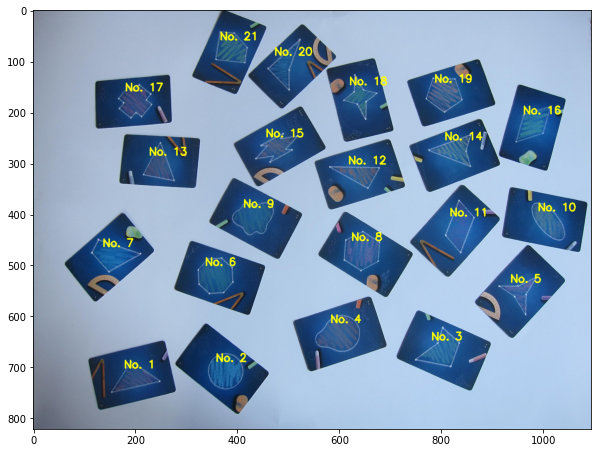

In [424]:
#Перевод изображения в пространство HSV
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
#plt.imshow(hsv[:,:,2], cmap = "gray")

#Сглаживание медианным фильтром
ker_sz = 7
blurred = cv2.medianBlur(hsv, ker_sz)
#plt.imshow(blurred[:,:,2], cmap = "gray")

#Определение границ карточек
th3 = cv2.adaptiveThreshold(blurred[:, :, 2], 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY_INV, ker_sz, ker_sz)
#plt.imshow(th3, cmap = "gray")

#Определение границ карточек и фигур
th4 = cv2.adaptiveThreshold(hsv[:, :, 2], 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY_INV, ker_sz, ker_sz)
#plt.imshow(th4, cmap = "gray")

#Дилатация границ карточек
kernel = np.ones([6, 6], np.uint8)
dil = cv2.dilate(th3, kernel)
#plt.imshow(dil, cmap = "gray")

#Удаление границ фигур с помощью конъюнкции
res = cv2.bitwise_and(th4, 255 - dil)
#plt.imshow(res, cmap = "gray")

#Дилатация полученного результата
k = np.ones([3, 3], np.uint8)

rd = cv2.dilate(res, k)

#Кластеризация полученных точек
connectivity = 4
output = cv2.connectedComponentsWithStats(rd, connectivity, cv2.CV_32S)
labels = output[1]
stats = output[2]

#Порог для отсева кластеров по площади
AREA_TH = h*w/1000

for i in range(len(stats)):
    area = stats[i, cv2.CC_STAT_AREA]
    if (area < AREA_TH):
        rd[np.where(labels == i)] = 0

#plt.imshow(rd, cmap = "gray")

contours, hierarchy = cv2.findContours(rd, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
result = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)
#cv2.drawContours(result, contours, -1, (255,0,0), 2, cv2.LINE_AA, hierarchy, 1 )
for i in range(len(contours)):
    M = cv2.moments(contours[i])
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    cv2.putText(result, "No. " + str(i+1), (cX - 20, cY - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,0), 2)
plt.imshow(result) 

In [420]:
#Выбор директории для вывода файла
fc_out = FileChooser()
display(fc_out)

FileChooser(path='C:\Users\Vladislav\Documents\Processing and recognition of images', filename='', title='', s…

In [421]:
cv2.imwrite(fc_out.selected+"result.jpg", cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

True